<a href="https://colab.research.google.com/github/mariadelmark/RetailStrategyAnalytics/blob/main/TrialStoreAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


file_path = '/content/QVI_data.csv'

storeData = pd.read_csv(file_path)

storeData.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,MONTH
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019-05
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019-05
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,2018-08
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,2018-08


In [3]:
storeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246742 entries, 0 to 246741
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            246742 non-null  object 
 1   STORE_NBR       246742 non-null  int64  
 2   LYLTY_CARD_NBR  246742 non-null  int64  
 3   TXN_ID          246742 non-null  int64  
 4   PROD_NBR        246742 non-null  int64  
 5   PROD_NAME       246742 non-null  object 
 6   PROD_QTY        246742 non-null  int64  
 7   TOT_SALES       246742 non-null  float64
 8   MONTH           246742 non-null  object 
dtypes: float64(1), int64(5), object(3)
memory usage: 16.9+ MB


# Selection of control stores


The client has selected store numbers 77, 86 and 88 as trial stores and want
control stores to be established stores that are operational for the entire
observation period.
We would want to match trial stores to control stores that are similar to the trial
store prior to the trial period of Feb 2019 in terms of :
- Monthly overall sales revenue
- Monthly number of customers
- Monthly number of transactions per customer

Let's first create the metrics of interest and filter to stores that are present.Let's add a new month ID column in the data with the format yyyymm.

In [4]:
storeData["DATE"] = pd.to_datetime(storeData["DATE"])
storeData["YEARMONTH"] = storeData["DATE"].dt.strftime("%Y%m")
print(storeData)


             DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0      2018-10-17          1            1000       1         5   
1      2019-05-14          1            1307     348        66   
2      2019-05-20          1            1343     383        61   
3      2018-08-17          2            2373     974        69   
4      2018-08-18          2            2426    1038       108   
...           ...        ...             ...     ...       ...   
246737 2019-03-09        272          272319  270088        89   
246738 2018-08-13        272          272358  270154        74   
246739 2018-11-06        272          272379  270187        51   
246740 2018-12-27        272          272379  270188        42   
246741 2018-09-22        272          272380  270189        74   

                                       PROD_NAME  PROD_QTY  TOT_SALES  \
0         Natural Chip        Compny SeaSalt175g         2        6.0   
1                       CCs Nacho Cheese    175g         3   

In [5]:
storeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246742 entries, 0 to 246741
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            246742 non-null  datetime64[ns]
 1   STORE_NBR       246742 non-null  int64         
 2   LYLTY_CARD_NBR  246742 non-null  int64         
 3   TXN_ID          246742 non-null  int64         
 4   PROD_NBR        246742 non-null  int64         
 5   PROD_NAME       246742 non-null  object        
 6   PROD_QTY        246742 non-null  int64         
 7   TOT_SALES       246742 non-null  float64       
 8   MONTH           246742 non-null  object        
 9   YEARMONTH       246742 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 18.8+ MB


Next, we define the measure calculations to use during the analysis. For each store and month we calculate total sales, number of customers,
transactions per customer, chips per customer and the average price per unit.

In [6]:
# Group the data by store and month
grouped_data = storeData.groupby(['STORE_NBR', 'YEARMONTH'])

# Calculate total sales
total_sales = grouped_data['TOT_SALES'].sum()

# Calculate number of customers
num_customers = grouped_data['LYLTY_CARD_NBR'].nunique()

# Calculate transactions per customer
transactions_per_customer = grouped_data.size() / num_customers

# Calculate chips per customer
chips_per_customer = grouped_data['PROD_QTY'].sum() / num_customers

# Calculate average price per unit
average_price_per_unit = total_sales / grouped_data['PROD_QTY'].sum()

# Create a new DataFrame to store the results
metrics_df = pd.DataFrame({
    'Total_Sales': total_sales,
    'Num_Customers': num_customers,
    'Transactions_Per_Customer': transactions_per_customer,
    'Chips_Per_Customer': chips_per_customer,
    'Avg_Price_Per_Unit': average_price_per_unit
}).reset_index()

# Print the resulting DataFrame
print(metrics_df)


      STORE_NBR YEARMONTH  Total_Sales  Num_Customers  \
0             1    201807        188.9             47   
1             1    201808        168.4             41   
2             1    201809        268.1             57   
3             1    201810        175.4             39   
4             1    201811        184.8             44   
...         ...       ...          ...            ...   
3160        272    201902        385.3             44   
3161        272    201903        421.9             48   
3162        272    201904        445.1             54   
3163        272    201905        314.6             34   
3164        272    201906        301.9             33   

      Transactions_Per_Customer  Chips_Per_Customer  Avg_Price_Per_Unit  
0                      1.042553            1.234043            3.256897  
1                      1.000000            1.268293            3.238462  
2                      1.035088            1.245614            3.776056  
3                  

In [7]:
# Calculate month ID
storeData['YEARMONTH'] = storeData['DATE'].dt.year * 100 + storeData['DATE'].dt.month

# Define the measure calculations
measureOverTime = storeData.groupby(['STORE_NBR', 'YEARMONTH']).agg(
    totSales=('TOT_SALES', 'sum'),
    nCustomers=('LYLTY_CARD_NBR', 'nunique'),
    nTxnPerCust=('TXN_ID', lambda x: x.nunique() / x.nunique()),
    nChipsPerTxn=('PROD_QTY', lambda x: x.sum() / x.nunique())
).reset_index().sort_values(by=['STORE_NBR', 'YEARMONTH'])

# Calculate avgPricePerUnit separately
prodQtySum = storeData.groupby('PROD_QTY')['PROD_QTY'].transform('sum').astype(float)
measureOverTime['avgPricePerUnit'] = measureOverTime['totSales'] / prodQtySum

# Filter to the pre-trial period and stores with full observation periods
storesWithFullObs = measureOverTime.groupby('STORE_NBR').size().reset_index(name='N')['STORE_NBR'][measureOverTime.groupby('STORE_NBR').size().reset_index(name='N')['N'] == 12]
preTrialMeasures = measureOverTime[(measureOverTime['YEARMONTH'] < 201902) & (measureOverTime['STORE_NBR'].isin(storesWithFullObs))]



Now we need to work out a way of ranking how similar each potential control store is to the trial store. We
can calculate how correlated the performance of each store is to the trial store.
Let’s write a function for this so that we don’t have to calculate this for each trial store and control store pair.

In [8]:
def calculateCorrelation(inputTable, metricCol, storeComparison):
    calcCorrTable = pd.DataFrame(columns=['Store1', 'Store2', 'YEARMONTH', 'correlation'])

    storeNumbers = inputTable['STORE_NBR'].unique()
    for i in storeNumbers:
        store1_measure = inputTable.loc[inputTable['STORE_NBR'] == storeComparison, metricCol]
        store2_measure = inputTable.loc[inputTable['STORE_NBR'] == i, metricCol]

        if len(store1_measure) != len(store2_measure):
            continue

        calculatedMeasure = pd.DataFrame({
            'Store1': [storeComparison] * len(store1_measure),
            'Store2': [i] * len(store1_measure),
            'YEARMONTH': inputTable.loc[inputTable['STORE_NBR'] == storeComparison, 'YEARMONTH'].values[:len(store1_measure)],
            'correlation': store1_measure.corr(store2_measure)
        })
        calcCorrTable = pd.concat([calcCorrTable, calculatedMeasure], ignore_index=True)

    return calcCorrTable




In [9]:
def calculateMagnitudeDistance(input_table, metric_col, store_comparison):
    calc_dist_table = pd.DataFrame(columns=['Store1', 'Store2', 'YEARMONTH', 'measure'])
    store_numbers = input_table['STORE_NBR'].unique()

    for i in store_numbers:
        store1_measure = input_table.loc[input_table['STORE_NBR'] == store_comparison, metric_col]
        store2_measure = input_table.loc[input_table['STORE_NBR'] == i, metric_col]

        if len(store1_measure) != len(store2_measure):
            continue

        calculated_measure = pd.DataFrame({
            'Store1': [store_comparison] * len(store1_measure),
            'Store2': [i] * len(store1_measure),
            'YEARMONTH': input_table.loc[input_table['STORE_NBR'] == store_comparison, 'YEARMONTH'].values[:len(store1_measure)],
            'measure': np.abs(store1_measure.values - store2_measure.values)
        })
        calc_dist_table = pd.concat([calc_dist_table, calculated_measure], ignore_index=True)

    min_max_dist = calc_dist_table.groupby(['Store1', 'YEARMONTH'])['measure'].agg(['min', 'max']).reset_index()
    dist_table = pd.merge(calc_dist_table, min_max_dist, on=['Store1', 'YEARMONTH'])
    dist_table['magnitudeMeasure'] = 1 - (dist_table['measure'] - dist_table['min']) / (dist_table['max'] - dist_table['min'])

    final_dist_table = dist_table.groupby(['Store1', 'Store2'])['magnitudeMeasure'].mean().reset_index()
    final_dist_table.rename(columns={'magnitudeMeasure': 'mag_measure'}, inplace=True)

    return final_dist_table


Now let's use the functions to find the control stores. We'll select control stores
based on how similar monthly total sales in dollar amounts and monthly number of
customers are to the trial stores. So we will need to use our functions to get four
scores, two for each of total sales and total customers.

In [10]:
trial_store = 77
corr_nSales = calculateCorrelation(preTrialMeasures, 'totSales', trial_store)
corr_nCustomers = calculateCorrelation(preTrialMeasures, 'nCustomers', trial_store)
magnitude_nSales = calculateMagnitudeDistance(preTrialMeasures, 'totSales', trial_store)
magnitude_nCustomers = calculateMagnitudeDistance(preTrialMeasures, 'nCustomers', trial_store)

We’ll need to combine the all the scores calculated using our function to create a composite score to rank
on.
Let’s take a simple average of the correlation and magnitude scores for each driver. Note that if we consider
it more important for the trend of the drivers to be similar, we can increase the weight of the correlation
score (a simple average gives a weight of 0.5 to the corr_weight) or if we consider the absolute size of the
drivers to be more important, we can lower the weight of the correlation score.

In [11]:

# Extract column names
corr_nSales_col = corr_nSales.columns[2]  # Assuming the correlation column name is at index 2
magnitude_nSales_col = magnitude_nSales.columns[2]  # Assuming the magnitude column name is at index 2
corr_nCustomers_col = corr_nCustomers.columns[2]  # Assuming the correlation column name is at index 2
magnitude_nCustomers_col = magnitude_nCustomers.columns[2]  # Assuming the magnitude column name is at index 2

corr_weight = 0.5

# For nSales
score_nSales = pd.merge(corr_nSales, magnitude_nSales, on=['Store1', 'Store2'])
score_nSales['scoreNSales'] = score_nSales[corr_nSales_col] * corr_weight + score_nSales[magnitude_nSales_col] * (1 - corr_weight)

# For nCustomers
score_nCustomers = pd.merge(corr_nCustomers, magnitude_nCustomers, on=['Store1', 'Store2'])
score_nCustomers['scoreNCust'] = score_nCustomers[corr_nCustomers_col] * corr_weight + score_nCustomers[magnitude_nCustomers_col] * (1 - corr_weight)



Now we have a score for each of total number of sales and number of customers. Let’s combine the two
via a simple average.


In [12]:
score_Control = pd.merge(score_nSales, score_nCustomers, on=['Store1', 'Store2'])
score_Control['finalControlScore'] = score_Control['scoreNSales'] * 0.5 + score_Control['scoreNCust'] * 0.5


The store with the highest score is then selected as the control store since it is most similar to the trial store.


In [13]:
control_store = score_Control[score_Control['Store1'] == trial_store].sort_values('finalControlScore', ascending=False)['Store2'].iloc[1]
print(control_store)


233


Now that we have found a control store, let’s check visually if the drivers are indeed similar in the period
before the trial.
We’ll look at total sales first.

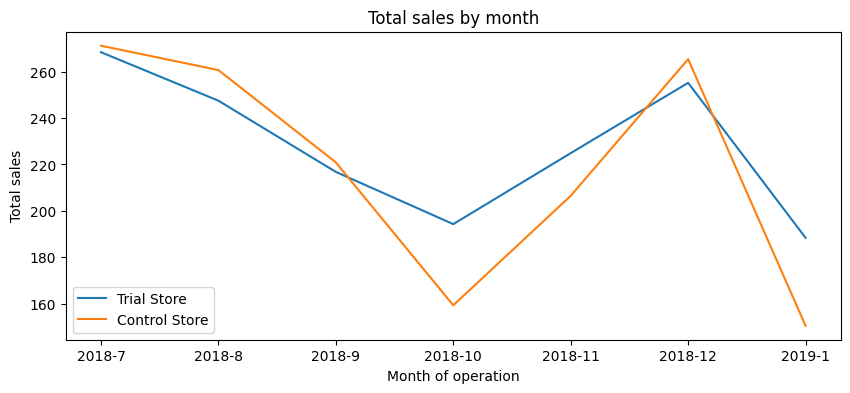

In [14]:

# Filter data for trial and control stores
trial_data = preTrialMeasures[preTrialMeasures['STORE_NBR'] == trial_store]
control_data = preTrialMeasures[preTrialMeasures['STORE_NBR'] == control_store]

# Combine trial and control data
plot_data = pd.concat([trial_data, control_data], ignore_index=True)

# Extract year and month from YEARMONTH
plot_data['Year'] = plot_data['YEARMONTH'] // 100
plot_data['Month'] = plot_data['YEARMONTH'] % 100

# Convert Year and Month to string
plot_data['Year'] = plot_data['Year'].astype(str)
plot_data['Month'] = plot_data['Month'].astype(str)

# Combine Year and Month columns
plot_data['TransactionMonth'] = plot_data['Year'] + '-' + plot_data['Month']

# Create the plot
plt.figure(figsize=(10, 4))  # Set the size of the plot

# Plotting lines for trial store and control store
plt.plot(plot_data.loc[plot_data['STORE_NBR'] == trial_store, 'TransactionMonth'], plot_data.loc[plot_data['STORE_NBR'] == trial_store, 'totSales'], label='Trial Store')
plt.plot(plot_data.loc[plot_data['STORE_NBR'] == control_store, 'TransactionMonth'], plot_data.loc[plot_data['STORE_NBR'] == control_store, 'totSales'], label='Control Store')

# Set labels and title
plt.xlabel('Month of operation')
plt.ylabel('Total sales')
plt.title('Total sales by month')

# Add a legend
plt.legend()

# Show the plot
plt.show()


Next, number of customers.

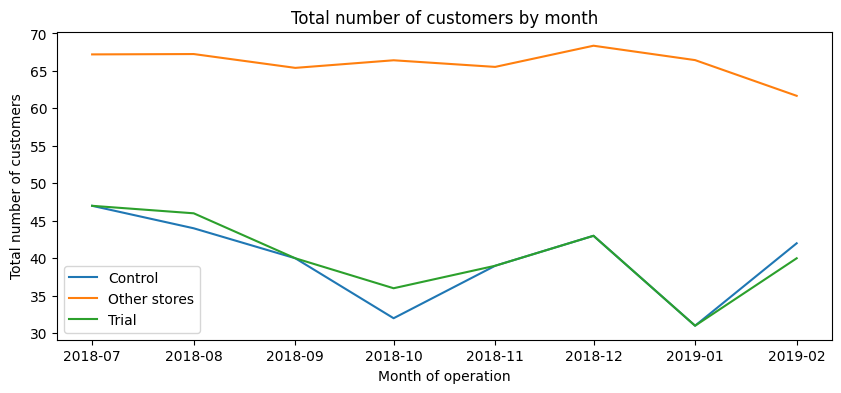

In [15]:
# Create a copy of measureOverTimeCusts
pastCustomers = measureOverTime.copy()

# Add the Store_type column
pastCustomers['Store_type'] = pastCustomers.apply(lambda row: 'Trial' if row['STORE_NBR'] == trial_store else ('Control' if row['STORE_NBR'] == control_store else 'Other stores'), axis=1)

# Calculate the mean number of customers by YEARMONTH and Store_type
pastCustomers = pastCustomers.groupby(['YEARMONTH', 'Store_type']).agg(numberCustomers=('nCustomers', 'mean')).reset_index()

# Convert YEARMONTH to datetime format
pastCustomers['TransactionMonth'] = pd.to_datetime(pastCustomers['YEARMONTH'], format='%Y%m')

# Filter data for months before 201903
pastCustomers = pastCustomers[pastCustomers['YEARMONTH'] < 201903]

# Create the plot
plt.figure(figsize=(10, 4))

# Plotting lines for each store type
for store_type, group_data in pastCustomers.groupby('Store_type'):
    plt.plot(group_data['TransactionMonth'], group_data['numberCustomers'], label=store_type)

# Set labels and title
plt.xlabel('Month of operation')
plt.ylabel('Total number of customers')
plt.title('Total number of customers by month')

# Add a legend
plt.legend()

# Show the plot
plt.show()



# Assessment of trial

##Trial store 77

The trial period goes from the start of March 2019 to June 2019. We now want to see if there has been an
uplift in overall chip sales.
We’ll start with scaling the control store’s sales to a level similar to control for any differences between the
two stores outside of the trial period

In [16]:
# Calculate the scaling factor for control sales
scalingFactorForControlSales = preTrialMeasures.loc[(preTrialMeasures['STORE_NBR'] == trial_store) & (preTrialMeasures['YEARMONTH'] < 201902), 'totSales'].sum() / preTrialMeasures.loc[(preTrialMeasures['STORE_NBR'] == control_store) & (preTrialMeasures['YEARMONTH'] < 201902), 'totSales'].sum()

# Apply the scaling factor
measureOverTimeSales = measureOverTime.copy()
scaledControlSales = measureOverTimeSales.loc[measureOverTimeSales['STORE_NBR'] == control_store, 'totSales'] * scalingFactorForControlSales


Now that we have comparable sales figures for the control store, we can calculate the percentage difference
between the scaled control sales and the trial store’s sales during the trial period

In [17]:
# Calculate the scaling factor for control sales
scalingFactorForControlSales = preTrialMeasures.loc[(preTrialMeasures['STORE_NBR'] == trial_store) & (preTrialMeasures['YEARMONTH'] < 201902), 'totSales'].sum() / preTrialMeasures.loc[(preTrialMeasures['STORE_NBR'] == control_store) & (preTrialMeasures['YEARMONTH'] < 201902), 'totSales'].sum()

# Apply the scaling factor
measureOverTimeSales = measureOverTime.copy()
measureOverTimeSales.loc[measureOverTimeSales['STORE_NBR'] == control_store, 'controlSales'] = measureOverTimeSales.loc[measureOverTimeSales['STORE_NBR'] == control_store, 'totSales'] * scalingFactorForControlSales

# Merge scaled control sales and trial sales dataframes
percentageDiff = pd.merge(measureOverTimeSales.loc[measureOverTimeSales['STORE_NBR'] == control_store, ['YEARMONTH', 'controlSales']], measureOverTime.loc[measureOverTime['STORE_NBR'] == trial_store, ['totSales', 'YEARMONTH']], on='YEARMONTH')

# Calculate the percentage difference
percentageDiff['percentageDiff'] = abs(percentageDiff['controlSales'] - percentageDiff['totSales']) / percentageDiff['controlSales']

print(percentageDiff)



    YEARMONTH  controlSales  totSales  percentageDiff
0      201807    281.980841     268.4        0.048162
1      201808    271.063441     247.5        0.086930
2      201809    229.681297     216.8        0.056083
3      201810    165.632551     194.3        0.173079
4      201811    214.708863     224.9        0.047465
5      201812    275.950277     255.2        0.075196
6      201901    156.482731     188.4        0.203967
7      201902    229.473346     211.6        0.077889
8      201903    187.779277     255.1        0.358510
9      201904    149.932291     258.1        0.721444
10     201905    324.506712     272.3        0.160880
11     201906    204.831215     246.6        0.203918


Let’s see if the difference is significant!
As our null hypothesis is that the trial period is the same as the
pre‐trial period, let's take the standard deviation based on the scaled
percentage difference in the pre‐trial period. Note that there are 8 months in the pre‐trial period, hence 8 ‐ 1 = 7 degrees of freedom. We will test with a null hypothesis of there being 0 difference between trial and control stores


In [18]:
# Calculate the standard deviation in the pre-trial period
stdDev = np.std(percentageDiff.loc[percentageDiff['YEARMONTH'] < 201902, 'percentageDiff'])

# Define the degrees of freedom
degreesOfFreedom = 7

# Calculate the t-value for each month in the selected period
percentageDiff['tValue'] = (percentageDiff['percentageDiff'] - 0) / stdDev
percentageDiff['TransactionMonth'] = pd.to_datetime(percentageDiff['YEARMONTH'], format='%Y%m').dt.to_period('M').dt.to_timestamp()
selectedPeriod = percentageDiff.loc[(percentageDiff['YEARMONTH'] < 201905) & (percentageDiff['YEARMONTH'] > 201901), ['TransactionMonth', 'tValue']]

print(selectedPeriod)



  TransactionMonth     tValue
7       2019-02-01   1.321977
8       2019-03-01   6.084869
9       2019-04-01  12.244825


In [19]:
from scipy.stats import t

# Find the 95th percentile of the t-distribution
percentile_95 = t.ppf(0.95, degreesOfFreedom)

print(percentile_95)


1.894578605061305


We can observe that the t-value is much larger than the 95th percentile value of the t-distribution for March
and April - i.e. the increase in sales in the trial store in March and April is statistically greater than in the
control store.
Let’s create a more visual version of this by plotting the sales of the control store, the sales of the trial stores
and the 95th percentile value of sales of the control store

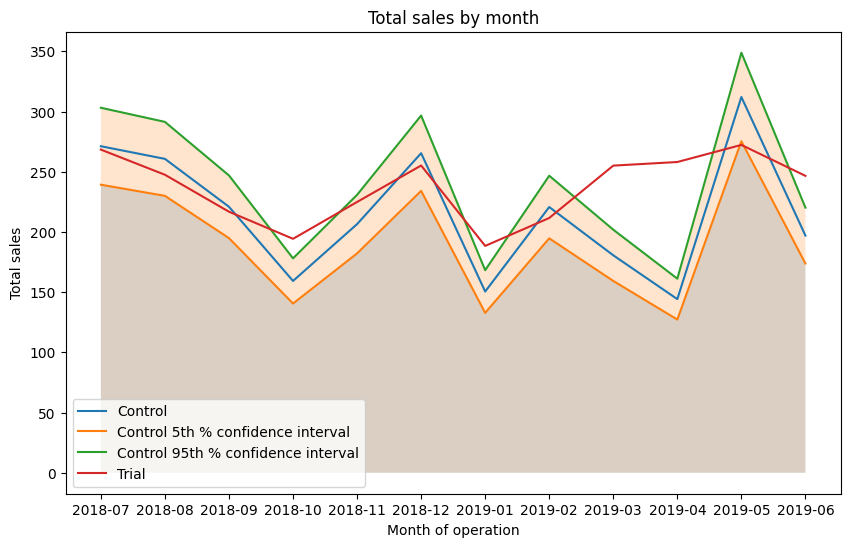

In [20]:
# Copy measureOverTime to measureOverTimeSales
measureOverTimeSales = measureOverTime.copy()

# Trial and control store total sales
measureOverTimeSales['Store_type'] = measureOverTimeSales['STORE_NBR'].map(
    lambda x: 'Trial' if x == trial_store else ('Control' if x == control_store else 'Other stores')
)
pastSales = measureOverTimeSales.groupby(['YEARMONTH', 'Store_type']).mean('totSales').reset_index()
pastSales['TransactionMonth'] = pd.to_datetime(pastSales['YEARMONTH'].astype(str), format='%Y%m').dt.to_period('M')
pastSales = pastSales[pastSales['Store_type'].isin(['Trial', 'Control'])]

# Control store 95th percentile
pastSales_Controls95 = pastSales[pastSales['Store_type'] == 'Control'].copy()
pastSales_Controls95['totSales'] = pastSales_Controls95['totSales'] * (1 + stdDev * 2)
pastSales_Controls95['Store_type'] = 'Control 95th % confidence interval'

# Control store 5th percentile
pastSales_Controls5 = pastSales[pastSales['Store_type'] == 'Control'].copy()
pastSales_Controls5['totSales'] = pastSales_Controls5['totSales'] * (1 - stdDev * 2)
pastSales_Controls5['Store_type'] = 'Control 5th % confidence interval'

# Combine all dataframes
trialAssessment = pd.concat([pastSales, pastSales_Controls95, pastSales_Controls5])

# Plotting
plt.figure(figsize=(10, 6))
for store_type, data in trialAssessment.groupby('Store_type'):
    plt.plot(data['TransactionMonth'].astype(str), data['totSales'], label=store_type)
    if store_type == 'Control 95th % confidence interval' or store_type == 'Control 5th % confidence interval':
        plt.fill_between(data['TransactionMonth'].astype(str), 0, data['totSales'], alpha=0.2)

plt.title('Total sales by month')
plt.xlabel('Month of operation')
plt.ylabel('Total sales')
plt.legend()
plt.show()




The results show that the trial in store 77 is significantly different to its control store in the trial period as
the trial store performance lies outside the 5% to 95% confidence interval of the control store in two of the
three trial months.
Let’s have a look at assessing this for number of customers as well.

In [21]:
# Calculate the scaling factor for control sales
scalingFactorForControlSales = preTrialMeasures.loc[(preTrialMeasures['STORE_NBR'] == trial_store) & (preTrialMeasures['YEARMONTH'] < 201902), 'totSales'].sum() / preTrialMeasures.loc[(preTrialMeasures['STORE_NBR'] == control_store) & (preTrialMeasures['YEARMONTH'] < 201902), 'totSales'].sum()

# Apply the scaling factor
measureOverTimeSales = measureOverTime.copy()
measureOverTimeSales.loc[measureOverTimeSales['STORE_NBR'] == control_store, 'controlSales'] = measureOverTimeSales.loc[measureOverTimeSales['STORE_NBR'] == control_store, 'totSales'] * scalingFactorForControlSales

# Merge scaled control sales and trial sales dataframes
percentageDiff = pd.merge(measureOverTimeSales.loc[measureOverTimeSales['STORE_NBR'] == control_store, ['YEARMONTH', 'controlSales']], measureOverTime.loc[measureOverTime['STORE_NBR'] == trial_store, ['YEARMONTH', 'totSales']], on='YEARMONTH')

# Calculate the percentage difference
percentageDiff['percentageDiff'] = abs(percentageDiff['controlSales'] - percentageDiff['totSales']) / percentageDiff['controlSales']

print(percentageDiff)



    YEARMONTH  controlSales  totSales  percentageDiff
0      201807    281.980841     268.4        0.048162
1      201808    271.063441     247.5        0.086930
2      201809    229.681297     216.8        0.056083
3      201810    165.632551     194.3        0.173079
4      201811    214.708863     224.9        0.047465
5      201812    275.950277     255.2        0.075196
6      201901    156.482731     188.4        0.203967
7      201902    229.473346     211.6        0.077889
8      201903    187.779277     255.1        0.358510
9      201904    149.932291     258.1        0.721444
10     201905    324.506712     272.3        0.160880
11     201906    204.831215     246.6        0.203918


Let’s again see if the difference is significant visually!
As our null hypothesis is that the trial period is the same as the
pre‐trial period, let's take the standard deviation based on the scaled
percentage difference in the pre‐trial period

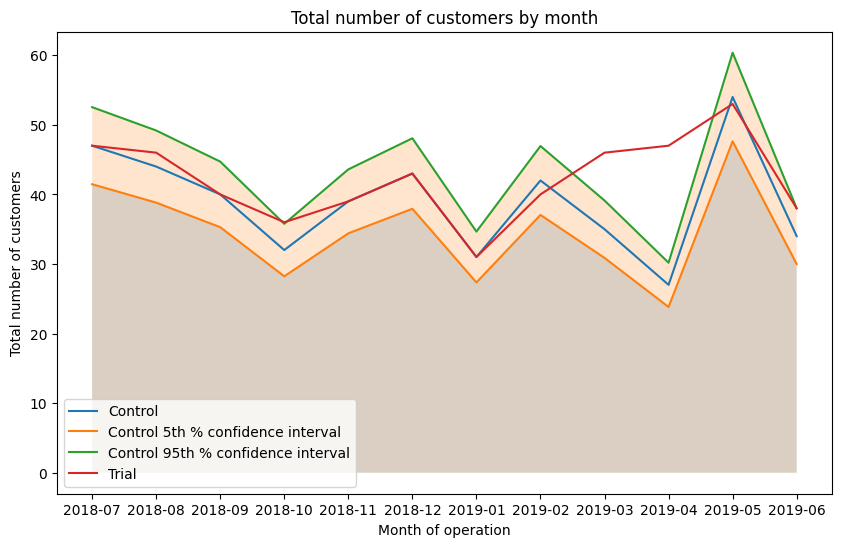

In [22]:
# Copy measureOverTime to measureOverTimeSales
measureOverTimeSales = measureOverTime.copy()

# Trial and control store total customers
measureOverTimeSales['Store_type'] = measureOverTimeSales['STORE_NBR'].map(
    lambda x: 'Trial' if x == trial_store else ('Control' if x == control_store else 'Other stores')
)
pastCustomers = measureOverTimeSales.groupby(['YEARMONTH', 'Store_type']).sum('nCustomers').reset_index()
pastCustomers['TransactionMonth'] = pd.to_datetime(pastCustomers['YEARMONTH'].astype(str), format='%Y%m').dt.to_period('M')
pastCustomers = pastCustomers[pastCustomers['Store_type'].isin(['Trial', 'Control'])]

# Control store 95th percentile
pastCustomers_Controls95 = pastCustomers[pastCustomers['Store_type'] == 'Control'].copy()
pastCustomers_Controls95['nCustomers'] = pastCustomers_Controls95['nCustomers'] * (1 + stdDev * 2)
pastCustomers_Controls95['Store_type'] = 'Control 95th % confidence interval'

# Control store 5th percentile
pastCustomers_Controls5 = pastCustomers[pastCustomers['Store_type'] == 'Control'].copy()
pastCustomers_Controls5['nCustomers'] = pastCustomers_Controls5['nCustomers'] * (1 - stdDev * 2)
pastCustomers_Controls5['Store_type'] = 'Control 5th % confidence interval'

# Combine all dataframes
trialAssessment = pd.concat([pastCustomers, pastCustomers_Controls95, pastCustomers_Controls5])

# Plotting
plt.figure(figsize=(10, 6))
for store_type, data in trialAssessment.groupby('Store_type'):
    plt.plot(data['TransactionMonth'].astype(str), data['nCustomers'], label=store_type)
    if store_type == 'Control 95th % confidence interval' or store_type == 'Control 5th % confidence interval':
        plt.fill_between(data['TransactionMonth'].astype(str), 0, data['nCustomers'], alpha=0.2)

plt.title('Total number of customers by month')
plt.xlabel('Month of operation')
plt.ylabel('Total number of customers')
plt.legend()
plt.show()




Let’s repeat finding the control store and assessing the impact of the trial for each of the other two trial
stores

##Trial store 86


In [23]:
trial_store = 86
corr_nSales = calculateCorrelation(preTrialMeasures, 'totSales', trial_store)
corr_nCustomers = calculateCorrelation(preTrialMeasures, 'nCustomers', trial_store)
magnitude_nSales = calculateMagnitudeDistance(preTrialMeasures, 'totSales', trial_store)
magnitude_nCustomers = calculateMagnitudeDistance(preTrialMeasures, 'nCustomers', trial_store)

In [24]:
# Extract column names
corr_nSales_col = corr_nSales.columns[2]  # Assuming the correlation column name is at index 2
magnitude_nSales_col = magnitude_nSales.columns[2]  # Assuming the magnitude column name is at index 2
corr_nCustomers_col = corr_nCustomers.columns[2]  # Assuming the correlation column name is at index 2
magnitude_nCustomers_col = magnitude_nCustomers.columns[2]  # Assuming the magnitude column name is at index 2

corr_weight = 0.5

# For nSales
score_nSales = pd.merge(corr_nSales, magnitude_nSales, on=['Store1', 'Store2'])
score_nSales['scoreNSales'] = score_nSales[corr_nSales_col] * corr_weight + score_nSales[magnitude_nSales_col] * (1 - corr_weight)

# For nCustomers
score_nCustomers = pd.merge(corr_nCustomers, magnitude_nCustomers, on=['Store1', 'Store2'])
score_nCustomers['scoreNCust'] = score_nCustomers[corr_nCustomers_col] * corr_weight + score_nCustomers[magnitude_nCustomers_col] * (1 - corr_weight)



In [25]:
score_Control = pd.merge(score_nSales, score_nCustomers, on=['Store1', 'Store2'])
score_Control['finalControlScore'] = score_Control['scoreNSales'] * 0.5 + score_Control['scoreNCust'] * 0.5

In [26]:
control_store = score_Control[score_Control['Store1'] == trial_store].sort_values('finalControlScore', ascending=False)['Store2'].iloc[1]
print(control_store)

155


Looks like store 155 will be a control store for trial store 86. Again, let’s check visually if the drivers are
indeed similar in the period before the trial.
We’ll look at total sales first

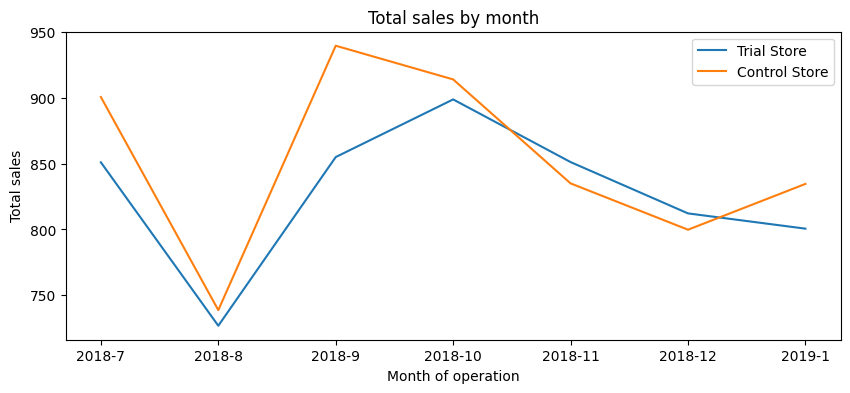

In [27]:
# Filter data for trial and control stores
trial_data = preTrialMeasures[preTrialMeasures['STORE_NBR'] == trial_store]
control_data = preTrialMeasures[preTrialMeasures['STORE_NBR'] == control_store]

# Combine trial and control data
plot_data = pd.concat([trial_data, control_data], ignore_index=True)

# Extract year and month from YEARMONTH
plot_data['Year'] = plot_data['YEARMONTH'] // 100
plot_data['Month'] = plot_data['YEARMONTH'] % 100

# Convert Year and Month to string
plot_data['Year'] = plot_data['Year'].astype(str)
plot_data['Month'] = plot_data['Month'].astype(str)

# Combine Year and Month columns
plot_data['TransactionMonth'] = plot_data['Year'] + '-' + plot_data['Month']

# Create the plot
plt.figure(figsize=(10, 4))  # Set the size of the plot

# Plotting lines for trial store and control store
plt.plot(plot_data.loc[plot_data['STORE_NBR'] == trial_store, 'TransactionMonth'], plot_data.loc[plot_data['STORE_NBR'] == trial_store, 'totSales'], label='Trial Store')
plt.plot(plot_data.loc[plot_data['STORE_NBR'] == control_store, 'TransactionMonth'], plot_data.loc[plot_data['STORE_NBR'] == control_store, 'totSales'], label='Control Store')

# Set labels and title
plt.xlabel('Month of operation')
plt.ylabel('Total sales')
plt.title('Total sales by month')

# Add a legend
plt.legend()

# Show the plot
plt.show()

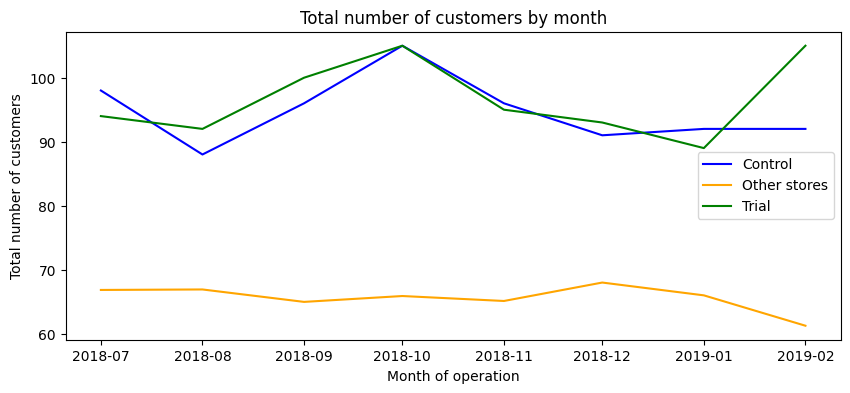

In [28]:
# Create a copy of measureOverTimeCusts
pastCustomers = measureOverTime.copy()

# Add the Store_type column
pastCustomers['Store_type'] = pastCustomers.apply(lambda row: 'Trial' if row['STORE_NBR'] == trial_store else ('Control' if row['STORE_NBR'] == control_store else 'Other stores'), axis=1)

# Calculate the mean number of customers by YEARMONTH and Store_type
pastCustomers = pastCustomers.groupby(['YEARMONTH', 'Store_type']).agg(numberCustomers=('nCustomers', 'mean')).reset_index()

# Convert YEARMONTH to datetime format
pastCustomers['TransactionMonth'] = pd.to_datetime(pastCustomers['YEARMONTH'], format='%Y%m')

# Filter data for months before 201903
pastCustomers = pastCustomers[pastCustomers['YEARMONTH'] < 201903]

# Create the plot
plt.figure(figsize=(10, 4))

# Plotting lines for each store type
store_types = pastCustomers['Store_type'].unique()
colors = ['blue', 'orange', 'green']  # Colors for Trial, Control, and Other Stores respectively

for i, store_type in enumerate(store_types):
    group_data = pastCustomers[pastCustomers['Store_type'] == store_type]
    plt.plot(group_data['TransactionMonth'], group_data['numberCustomers'], label=store_type, color=colors[i])

# Set labels and title
plt.xlabel('Month of operation')
plt.ylabel('Total number of customers')
plt.title('Total number of customers by month')

# Add a legend
plt.legend()

# Show the plot
plt.show()


Great, sales are trending in a similar way.
Next, number of customers.

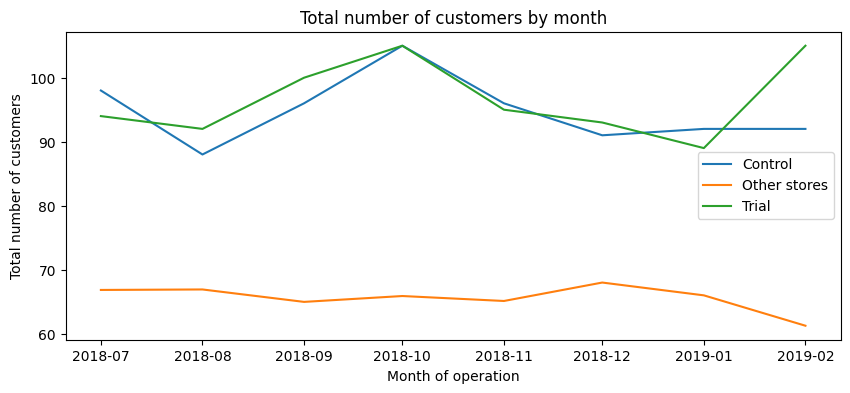

In [29]:
# Create a copy of measureOverTimeCusts
pastCustomers = measureOverTime.copy()

# Add the Store_type column
pastCustomers['Store_type'] = pastCustomers.apply(lambda row: 'Trial' if row['STORE_NBR'] == trial_store else ('Control' if row['STORE_NBR'] == control_store else 'Other stores'), axis=1)

# Calculate the mean number of customers by YEARMONTH and Store_type
pastCustomers = pastCustomers.groupby(['YEARMONTH', 'Store_type']).agg(numberCustomers=('nCustomers', 'mean')).reset_index()

# Convert YEARMONTH to datetime format
pastCustomers['TransactionMonth'] = pd.to_datetime(pastCustomers['YEARMONTH'], format='%Y%m')

# Filter data for months before 201903
pastCustomers = pastCustomers[pastCustomers['YEARMONTH'] < 201903]

# Create the plot
plt.figure(figsize=(10, 4))

# Plotting lines for each store type
for store_type, group_data in pastCustomers.groupby('Store_type'):
    plt.plot(group_data['TransactionMonth'], group_data['numberCustomers'], label=store_type)

# Set labels and title
plt.xlabel('Month of operation')
plt.ylabel('Total number of customers')
plt.title('Total number of customers by month')

# Add a legend
plt.legend()

Good, the trend in number of customers is also similar.
Let’s now assess the impact of the trial on sales.


In [30]:
# Calculate the scaling factor for control sales
scalingFactorForControlSales = preTrialMeasures.loc[(preTrialMeasures['STORE_NBR'] == trial_store) & (preTrialMeasures['YEARMONTH'] < 201902), 'totSales'].sum() / preTrialMeasures.loc[(preTrialMeasures['STORE_NBR'] == control_store) & (preTrialMeasures['YEARMONTH'] < 201902), 'totSales'].sum()

# Apply the scaling factor
measureOverTimeSales = measureOverTime.copy()
measureOverTimeSales.loc[measureOverTimeSales['STORE_NBR'] == control_store, 'controlSales'] = measureOverTimeSales.loc[measureOverTimeSales['STORE_NBR'] == control_store, 'totSales'] * scalingFactorForControlSales

# Merge scaled control sales and trial sales dataframes
percentageDiff = pd.merge(measureOverTimeSales.loc[measureOverTimeSales['STORE_NBR'] == control_store, ['YEARMONTH', 'controlSales']], measureOverTime.loc[measureOverTime['STORE_NBR'] == trial_store, ['totSales', 'YEARMONTH']], on='YEARMONTH')

# Calculate the percentage difference
percentageDiff['percentageDiff'] = abs(percentageDiff['controlSales'] - percentageDiff['totSales']) / percentageDiff['controlSales']

print(percentageDiff)


    YEARMONTH  controlSales  totSales  percentageDiff
0      201807    875.427669    851.00        0.027904
1      201808    718.052875    726.85        0.012251
2      201809    913.337595    855.00        0.063873
3      201810    888.453131    898.80        0.011646
4      201811    811.661230    851.20        0.048713
5      201812    777.445092    812.20        0.044704
6      201901    811.272410    800.60        0.013155
7      201902    827.019610    872.80        0.055356
8      201903    745.561872    945.40        0.268037
9      201904    778.028321    804.00        0.033381
10     201905    839.121625    826.90        0.014565
11     201906    739.535166    766.00        0.035786


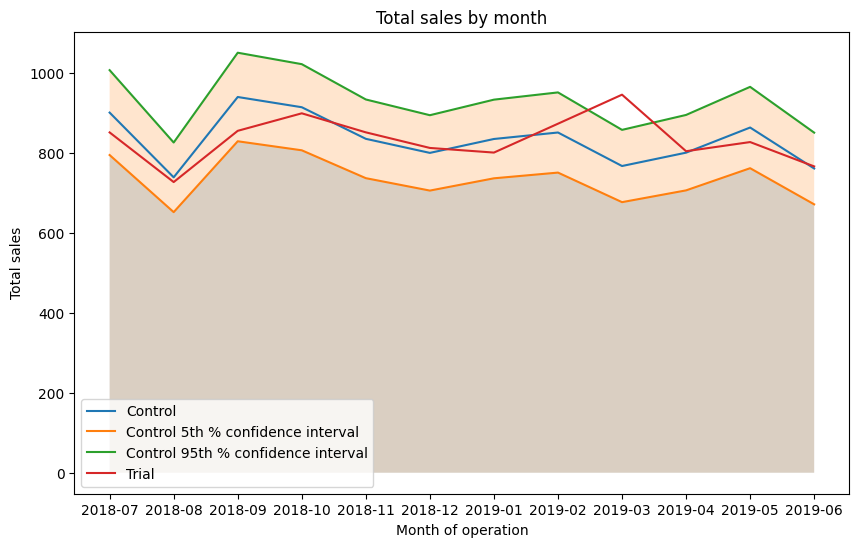

In [31]:
# Copy measureOverTime to measureOverTimeSales
measureOverTimeSales = measureOverTime.copy()

# Trial and control store total sales
measureOverTimeSales['Store_type'] = measureOverTimeSales['STORE_NBR'].map(
    lambda x: 'Trial' if x == trial_store else ('Control' if x == control_store else 'Other stores')
)
pastSales = measureOverTimeSales.groupby(['YEARMONTH', 'Store_type']).mean('totSales').reset_index()
pastSales['TransactionMonth'] = pd.to_datetime(pastSales['YEARMONTH'].astype(str), format='%Y%m').dt.to_period('M')
pastSales = pastSales[pastSales['Store_type'].isin(['Trial', 'Control'])]

# Control store 95th percentile
pastSales_Controls95 = pastSales[pastSales['Store_type'] == 'Control'].copy()
pastSales_Controls95['totSales'] = pastSales_Controls95['totSales'] * (1 + stdDev * 2)
pastSales_Controls95['Store_type'] = 'Control 95th % confidence interval'

# Control store 5th percentile
pastSales_Controls5 = pastSales[pastSales['Store_type'] == 'Control'].copy()
pastSales_Controls5['totSales'] = pastSales_Controls5['totSales'] * (1 - stdDev * 2)
pastSales_Controls5['Store_type'] = 'Control 5th % confidence interval'

# Combine all dataframes
trialAssessment = pd.concat([pastSales, pastSales_Controls95, pastSales_Controls5])

# Plotting
plt.figure(figsize=(10, 6))
for store_type, data in trialAssessment.groupby('Store_type'):
    plt.plot(data['TransactionMonth'].astype(str), data['totSales'], label=store_type)
    if store_type == 'Control 95th % confidence interval' or store_type == 'Control 5th % confidence interval':
        plt.fill_between(data['TransactionMonth'].astype(str), 0, data['totSales'], alpha=0.2)

plt.title('Total sales by month')
plt.xlabel('Month of operation')
plt.ylabel('Total sales')
plt.legend()
plt.show()


The results show that the trial in store 86 is not significantly different to its control store in the trial period
as the trial store performance lies inside the 5% to 95% confidence interval of the control store in two of the
three trial months.
Let’s have a look at assessing this for number of customers as well

Let’s have a look at assessing this for number of customers as well.


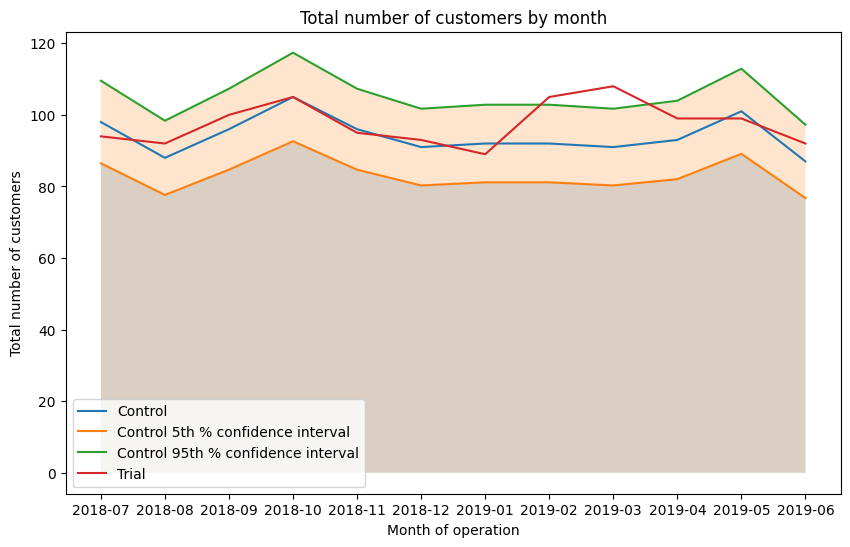

In [32]:
# Copy measureOverTime to measureOverTimeSales
measureOverTimeSales = measureOverTime.copy()

# Trial and control store total customers
measureOverTimeSales['Store_type'] = measureOverTimeSales['STORE_NBR'].map(
    lambda x: 'Trial' if x == trial_store else ('Control' if x == control_store else 'Other stores')
)
pastCustomers = measureOverTimeSales.groupby(['YEARMONTH', 'Store_type']).sum('nCustomers').reset_index()
pastCustomers['TransactionMonth'] = pd.to_datetime(pastCustomers['YEARMONTH'].astype(str), format='%Y%m').dt.to_period('M')
pastCustomers = pastCustomers[pastCustomers['Store_type'].isin(['Trial', 'Control'])]

# Control store 95th percentile
pastCustomers_Controls95 = pastCustomers[pastCustomers['Store_type'] == 'Control'].copy()
pastCustomers_Controls95['nCustomers'] = pastCustomers_Controls95['nCustomers'] * (1 + stdDev * 2)
pastCustomers_Controls95['Store_type'] = 'Control 95th % confidence interval'

# Control store 5th percentile
pastCustomers_Controls5 = pastCustomers[pastCustomers['Store_type'] == 'Control'].copy()
pastCustomers_Controls5['nCustomers'] = pastCustomers_Controls5['nCustomers'] * (1 - stdDev * 2)
pastCustomers_Controls5['Store_type'] = 'Control 5th % confidence interval'

# Combine all dataframes
trialAssessment = pd.concat([pastCustomers, pastCustomers_Controls95, pastCustomers_Controls5])

# Plotting
plt.figure(figsize=(10, 6))
for store_type, data in trialAssessment.groupby('Store_type'):
    plt.plot(data['TransactionMonth'].astype(str), data['nCustomers'], label=store_type)
    if store_type == 'Control 95th % confidence interval' or store_type == 'Control 5th % confidence interval':
        plt.fill_between(data['TransactionMonth'].astype(str), 0, data['nCustomers'], alpha=0.2)

plt.title('Total number of customers by month')
plt.xlabel('Month of operation')
plt.ylabel('Total number of customers')
plt.legend()
plt.show()



It looks like the number of customers is significantly higher in all of the three months. This seems to
suggest that the trial had a significant impact on increasing the number of customers in trial store 86 but
as we saw, sales were not significantly higher. We should check with the Category Manager if there were
special deals in the trial store that were may have resulted in lower prices, impacting the results.


## Trial store 88

In [33]:
trial_store = 88
corr_nSales = calculateCorrelation(preTrialMeasures, 'totSales', trial_store)
corr_nCustomers = calculateCorrelation(preTrialMeasures, 'nCustomers', trial_store)
magnitude_nSales = calculateMagnitudeDistance(preTrialMeasures, 'totSales', trial_store)
magnitude_nCustomers = calculateMagnitudeDistance(preTrialMeasures, 'nCustomers', trial_store)

In [34]:
# Extract column names
corr_nSales_col = corr_nSales.columns[2]  # Assuming the correlation column name is at index 2
magnitude_nSales_col = magnitude_nSales.columns[2]  # Assuming the magnitude column name is at index 2
corr_nCustomers_col = corr_nCustomers.columns[2]  # Assuming the correlation column name is at index 2
magnitude_nCustomers_col = magnitude_nCustomers.columns[2]  # Assuming the magnitude column name is at index 2

corr_weight = 0.5

# For nSales
score_nSales = pd.merge(corr_nSales, magnitude_nSales, on=['Store1', 'Store2'])
score_nSales['scoreNSales'] = score_nSales[corr_nSales_col] * corr_weight + score_nSales[magnitude_nSales_col] * (1 - corr_weight)

# For nCustomers
score_nCustomers = pd.merge(corr_nCustomers, magnitude_nCustomers, on=['Store1', 'Store2'])
score_nCustomers['scoreNCust'] = score_nCustomers[corr_nCustomers_col] * corr_weight + score_nCustomers[magnitude_nCustomers_col] * (1 - corr_weight)


In [35]:
score_Control = pd.merge(score_nSales, score_nCustomers, on=['Store1', 'Store2'])
score_Control['finalControlScore'] = score_Control['scoreNSales'] * 0.5 + score_Control['scoreNCust'] * 0.5

In [36]:
control_store = score_Control[score_Control['Store1'] == trial_store].sort_values('finalControlScore', ascending=False)['Store2'].iloc[1]
print(control_store)

237


We’ve now found store 237 to be a suitable control store for trial store 88.
Again, let’s check visually if the drivers are indeed similar in the period before the trial.
We’ll look at total sales first.


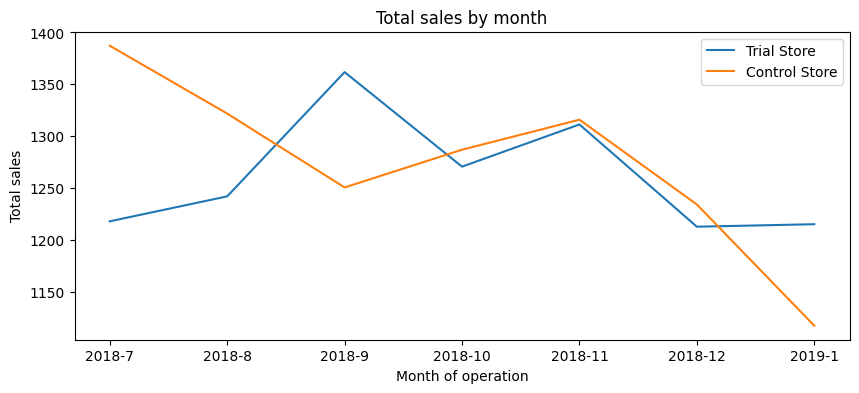

In [37]:
# Filter data for trial and control stores
trial_data = preTrialMeasures[preTrialMeasures['STORE_NBR'] == trial_store]
control_data = preTrialMeasures[preTrialMeasures['STORE_NBR'] == control_store]

# Combine trial and control data
plot_data = pd.concat([trial_data, control_data], ignore_index=True)

# Extract year and month from YEARMONTH
plot_data['Year'] = plot_data['YEARMONTH'] // 100
plot_data['Month'] = plot_data['YEARMONTH'] % 100

# Convert Year and Month to string
plot_data['Year'] = plot_data['Year'].astype(str)
plot_data['Month'] = plot_data['Month'].astype(str)

# Combine Year and Month columns
plot_data['TransactionMonth'] = plot_data['Year'] + '-' + plot_data['Month']

# Create the plot
plt.figure(figsize=(10, 4))  # Set the size of the plot

# Plotting lines for trial store and control store
plt.plot(plot_data.loc[plot_data['STORE_NBR'] == trial_store, 'TransactionMonth'], plot_data.loc[plot_data['STORE_NBR'] == trial_store, 'totSales'], label='Trial Store')
plt.plot(plot_data.loc[plot_data['STORE_NBR'] == control_store, 'TransactionMonth'], plot_data.loc[plot_data['STORE_NBR'] == control_store, 'totSales'], label='Control Store')

# Set labels and title
plt.xlabel('Month of operation')
plt.ylabel('Total sales')
plt.title('Total sales by month')

# Add a legend
plt.legend()

# Show the plot
plt.show()

Great, the trial and control stores have similar total sales.
Next, number of customers.

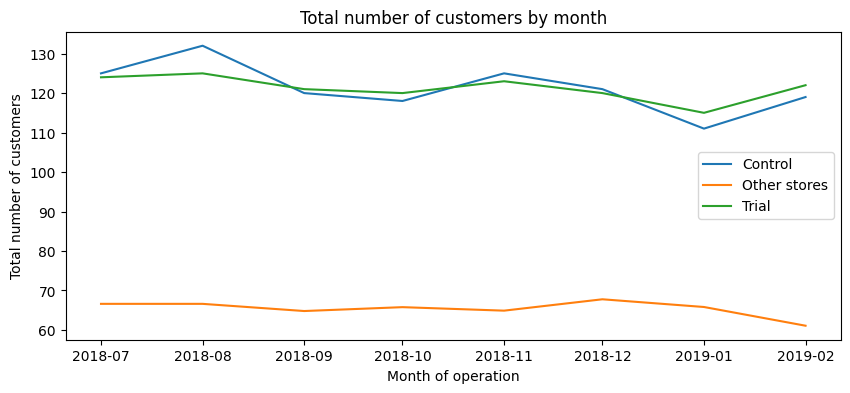

In [38]:
# Create a copy of measureOverTimeCusts
pastCustomers = measureOverTime.copy()

# Add the Store_type column
pastCustomers['Store_type'] = pastCustomers.apply(lambda row: 'Trial' if row['STORE_NBR'] == trial_store else ('Control' if row['STORE_NBR'] == control_store else 'Other stores'), axis=1)

# Calculate the mean number of customers by YEARMONTH and Store_type
pastCustomers = pastCustomers.groupby(['YEARMONTH', 'Store_type']).agg(numberCustomers=('nCustomers', 'mean')).reset_index()

# Convert YEARMONTH to datetime format
pastCustomers['TransactionMonth'] = pd.to_datetime(pastCustomers['YEARMONTH'], format='%Y%m')

# Filter data for months before 201903
pastCustomers = pastCustomers[pastCustomers['YEARMONTH'] < 201903]

# Create the plot
plt.figure(figsize=(10, 4))

# Plotting lines for each store type
for store_type, group_data in pastCustomers.groupby('Store_type'):
    plt.plot(group_data['TransactionMonth'], group_data['numberCustomers'], label=store_type)

# Set labels and title
plt.xlabel('Month of operation')
plt.ylabel('Total number of customers')
plt.title('Total number of customers by month')

# Add a legend
plt.legend()

Total number of customers of the control and trial stores are also similar.
Let’s now assess the impact of the trial on sales.


In [39]:
# Calculate the scaling factor for control sales
scalingFactorForControlSales = preTrialMeasures.loc[(preTrialMeasures['STORE_NBR'] == trial_store) & (preTrialMeasures['YEARMONTH'] < 201902), 'totSales'].sum() / preTrialMeasures.loc[(preTrialMeasures['STORE_NBR'] == control_store) & (preTrialMeasures['YEARMONTH'] < 201902), 'totSales'].sum()

# Apply the scaling factor
measureOverTimeSales = measureOverTime.copy()
measureOverTimeSales.loc[measureOverTimeSales['STORE_NBR'] == control_store, 'controlSales'] = measureOverTimeSales.loc[measureOverTimeSales['STORE_NBR'] == control_store, 'totSales'] * scalingFactorForControlSales

# Merge scaled control sales and trial sales dataframes
percentageDiff = pd.merge(measureOverTimeSales.loc[measureOverTimeSales['STORE_NBR'] == control_store, ['YEARMONTH', 'controlSales']], measureOverTime.loc[measureOverTime['STORE_NBR'] == trial_store, ['totSales', 'YEARMONTH']], on='YEARMONTH')

# Calculate the percentage difference
percentageDiff['percentageDiff'] = abs(percentageDiff['controlSales'] - percentageDiff['totSales']) / percentageDiff['controlSales']

print(percentageDiff)


    YEARMONTH  controlSales  totSales  percentageDiff
0      201807   1374.394024   1218.20        0.113646
1      201808   1309.696842   1242.20        0.051536
2      201809   1239.253204   1361.80        0.098888
3      201810   1275.218100   1270.80        0.003465
4      201811   1303.851308   1311.40        0.005790
5      201812   1223.004601   1213.00        0.008180
6      201901   1107.381921   1215.40        0.097544
7      201902   1300.879003   1339.60        0.029765
8      201903   1166.728952   1467.00        0.257361
9      201904   1142.950509   1317.00        0.152281
10     201905   1117.487759   1236.85        0.106813
11     201906   1132.844670   1252.60        0.105712


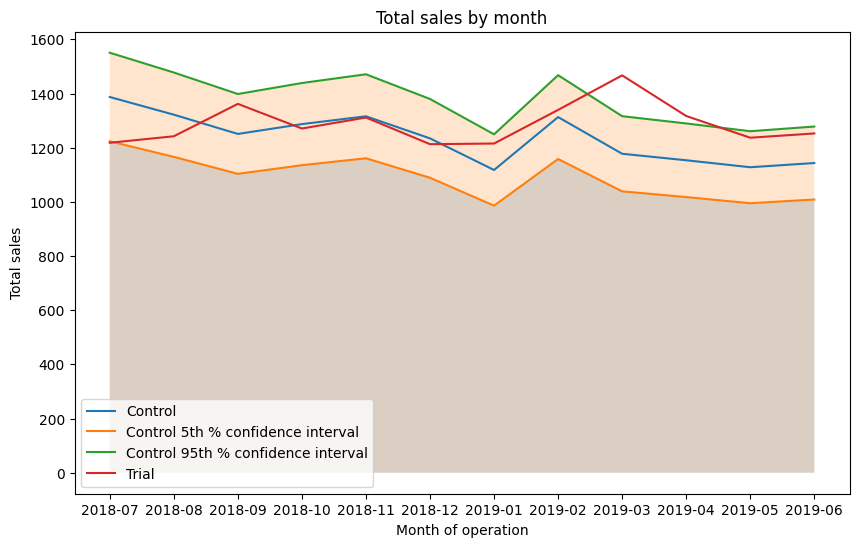

In [40]:
# Copy measureOverTime to measureOverTimeSales
measureOverTimeSales = measureOverTime.copy()

# Trial and control store total sales
measureOverTimeSales['Store_type'] = measureOverTimeSales['STORE_NBR'].map(
    lambda x: 'Trial' if x == trial_store else ('Control' if x == control_store else 'Other stores')
)
pastSales = measureOverTimeSales.groupby(['YEARMONTH', 'Store_type']).mean('totSales').reset_index()
pastSales['TransactionMonth'] = pd.to_datetime(pastSales['YEARMONTH'].astype(str), format='%Y%m').dt.to_period('M')
pastSales = pastSales[pastSales['Store_type'].isin(['Trial', 'Control'])]

# Control store 95th percentile
pastSales_Controls95 = pastSales[pastSales['Store_type'] == 'Control'].copy()
pastSales_Controls95['totSales'] = pastSales_Controls95['totSales'] * (1 + stdDev * 2)
pastSales_Controls95['Store_type'] = 'Control 95th % confidence interval'

# Control store 5th percentile
pastSales_Controls5 = pastSales[pastSales['Store_type'] == 'Control'].copy()
pastSales_Controls5['totSales'] = pastSales_Controls5['totSales'] * (1 - stdDev * 2)
pastSales_Controls5['Store_type'] = 'Control 5th % confidence interval'

# Combine all dataframes
trialAssessment = pd.concat([pastSales, pastSales_Controls95, pastSales_Controls5])

# Plotting
plt.figure(figsize=(10, 6))
for store_type, data in trialAssessment.groupby('Store_type'):
    plt.plot(data['TransactionMonth'].astype(str), data['totSales'], label=store_type)
    if store_type == 'Control 95th % confidence interval' or store_type == 'Control 5th % confidence interval':
        plt.fill_between(data['TransactionMonth'].astype(str), 0, data['totSales'], alpha=0.2)

plt.title('Total sales by month')
plt.xlabel('Month of operation')
plt.ylabel('Total sales')
plt.legend()
plt.show()


The results show that the trial in store 88 is significantly different to its control store in the trial period as the
trial store performance lies outside of the 5% to 95% confidence interval of the control store in two of the
three trial months.
Let’s have a look at assessing this for number of customers as well.


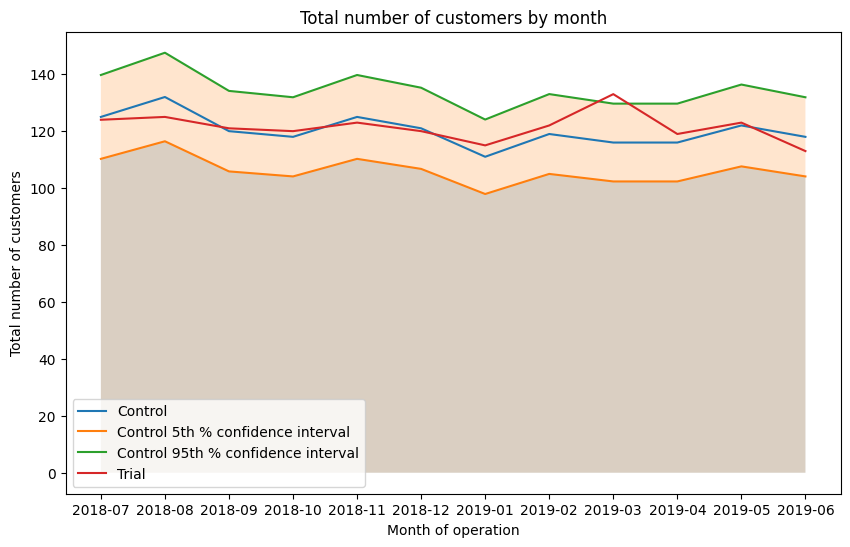

In [41]:
# Copy measureOverTime to measureOverTimeSales
measureOverTimeSales = measureOverTime.copy()

# Trial and control store total customers
measureOverTimeSales['Store_type'] = measureOverTimeSales['STORE_NBR'].map(
    lambda x: 'Trial' if x == trial_store else ('Control' if x == control_store else 'Other stores')
)
pastCustomers = measureOverTimeSales.groupby(['YEARMONTH', 'Store_type']).sum('nCustomers').reset_index()
pastCustomers['TransactionMonth'] = pd.to_datetime(pastCustomers['YEARMONTH'].astype(str), format='%Y%m').dt.to_period('M')
pastCustomers = pastCustomers[pastCustomers['Store_type'].isin(['Trial', 'Control'])]

# Control store 95th percentile
pastCustomers_Controls95 = pastCustomers[pastCustomers['Store_type'] == 'Control'].copy()
pastCustomers_Controls95['nCustomers'] = pastCustomers_Controls95['nCustomers'] * (1 + stdDev * 2)
pastCustomers_Controls95['Store_type'] = 'Control 95th % confidence interval'

# Control store 5th percentile
pastCustomers_Controls5 = pastCustomers[pastCustomers['Store_type'] == 'Control'].copy()
pastCustomers_Controls5['nCustomers'] = pastCustomers_Controls5['nCustomers'] * (1 - stdDev * 2)
pastCustomers_Controls5['Store_type'] = 'Control 5th % confidence interval'

# Combine all dataframes
trialAssessment = pd.concat([pastCustomers, pastCustomers_Controls95, pastCustomers_Controls5])

# Plotting
plt.figure(figsize=(10, 6))
for store_type, data in trialAssessment.groupby('Store_type'):
    plt.plot(data['TransactionMonth'].astype(str), data['nCustomers'], label=store_type)
    if store_type == 'Control 95th % confidence interval' or store_type == 'Control 5th % confidence interval':
        plt.fill_between(data['TransactionMonth'].astype(str), 0, data['nCustomers'], alpha=0.2)

plt.title('Total number of customers by month')
plt.xlabel('Month of operation')
plt.ylabel('Total number of customers')
plt.legend()
plt.show()


Total number of customers in the trial period for the trial store is significantly higher than the control store
for two out of three months, which indicates a positive trial effect.

#CONCLUSION

We’ve found control stores 233, 155, 237 for trial stores 77, 86 and 88 respectively.
The results for trial stores 77 and 88 during the trial period show a significant difference in at least two of the
three trial months but this is not the case for trial store 86. We can check with the client if the implementation
of the trial was different in trial store 86 but overall, the trial shows a significant increase in sales.